Credit:
- https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')
from sklearn.mixture import GaussianMixture

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
root = '/content/drive/MyDrive/SSDD/JPEGImages_sub/'
img = cv.imread(root + '/13_3_21.jpg',0)

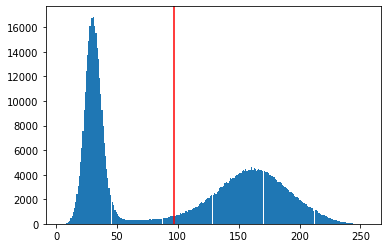

In [48]:
#equ = cv.equalizeHist(img)
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.axvline(x = ret3, color='r')
plt.hist(blur.ravel(),256)
plt.show()

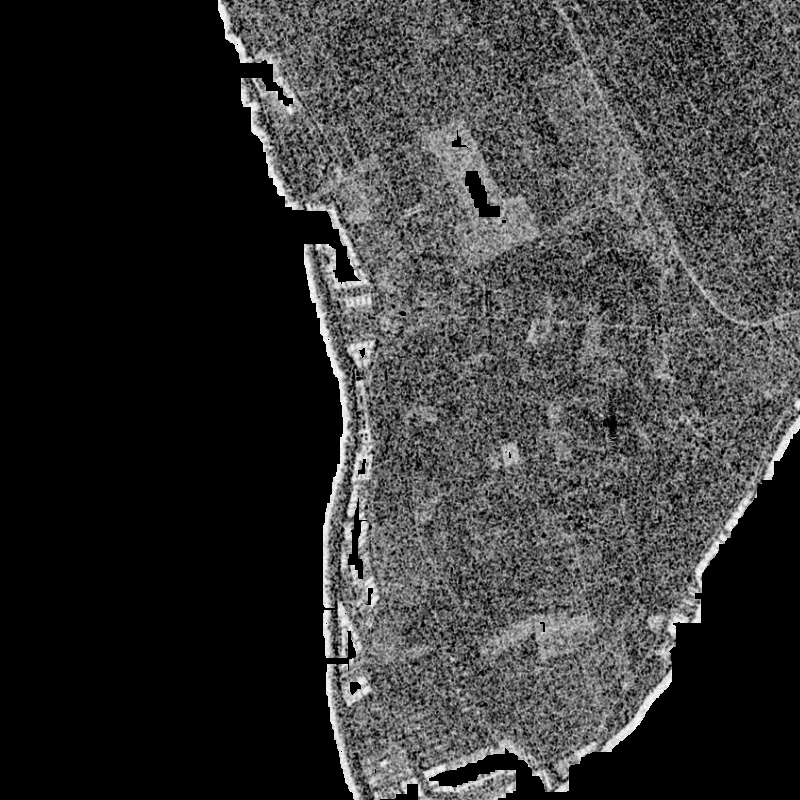

In [49]:
mask = th3
kernel = np.ones((5, 5), np.uint8)
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel, iterations=2)
mask = cv.erode(mask, kernel, iterations=2)
mask = cv.dilate(mask, kernel, iterations=5)
cv2_imshow(mask * img)

In [ ]:
def crop_image(img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

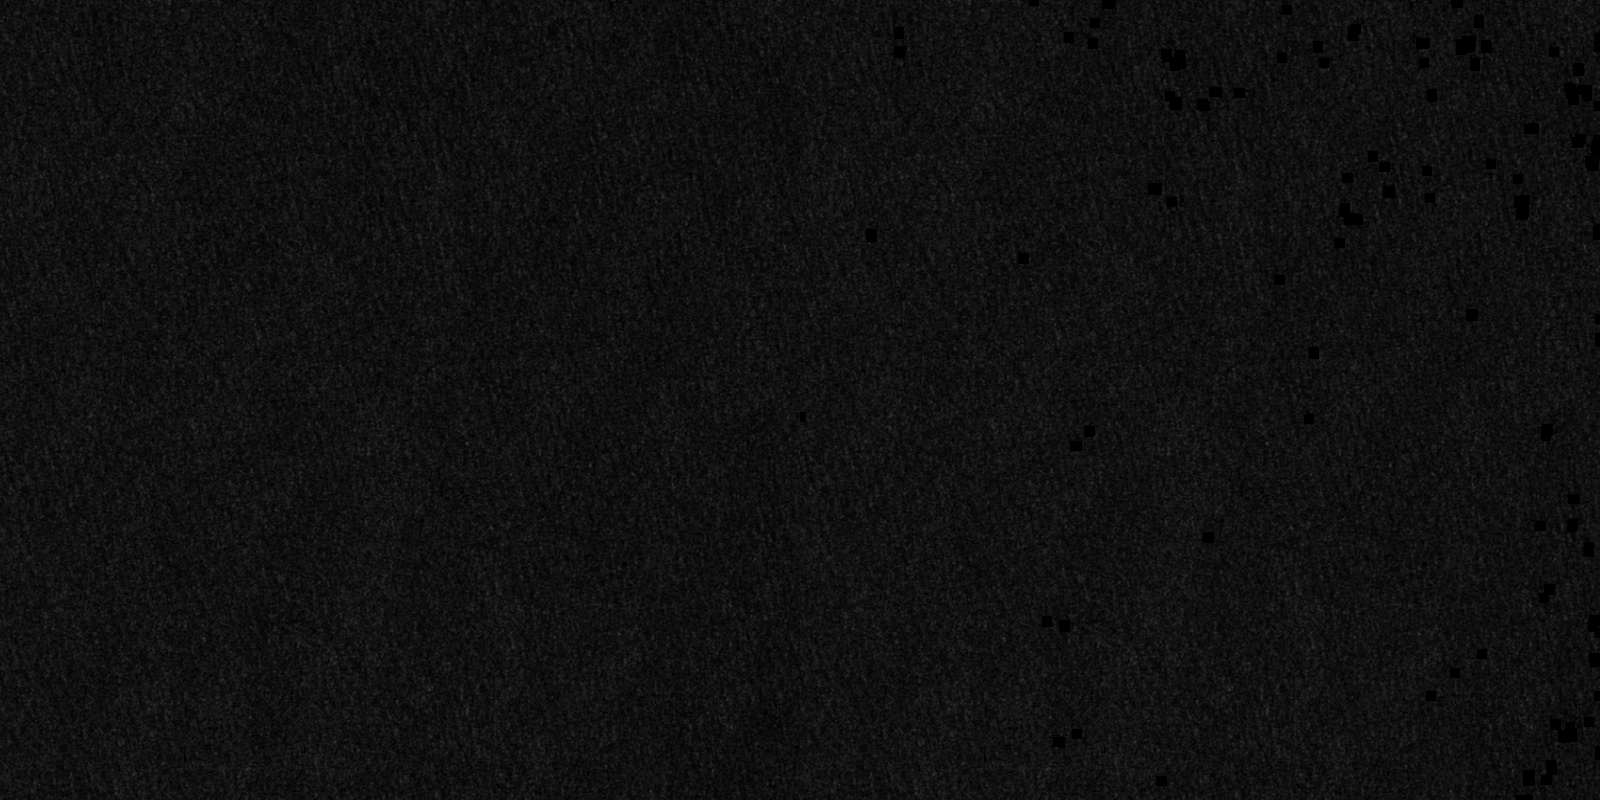

In [ ]:
root = '/content/drive/MyDrive/SSDD/JPEGImages_sub/'
img = cv.imread(root + '/01_1_3.jpg',0)
img = crop_image(img, tol=0)
FILTER = 10
BLUR = 5
res = cv.equalizeHist(img)
blur = cv.GaussianBlur(img,(BLUR,BLUR),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
mask = np.where(th3 == 255, 1, 0).astype('uint8')
kernel = np.ones((FILTER,FILTER),np.uint8)
morph = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
cv2_imshow(cv.hconcat([img, morph * img]))